In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve
#from labellines import *
import scipy

In [2]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_to_wavelength(vel, rest_wave=396.847, speed_of_light=299792458):
    """
    Converts a Doppler shift (observed frequency) to wavelength.

    Args:
        observed_frequency (float or array-like): The observed frequency of the wave.
        rest_frequency (float): The rest frequency of the wave (frequency at the source).
        speed_of_light (float, optional): The speed of light in m/s. Defaults to 299792458 m/s.

    Returns:
         float or array-like: The wavelength corresponding to the observed frequency.
    """

    delwave = -rest_wave*vel*1000/speed_of_light
    return delwave

def doppler_shift(observed_wavelength, source_wavelength, speed_of_light=299792.458):
    """
    Calculates the Doppler shift (z) and radial velocity (v) given observed and source wavelengths.

    Args:
        observed_wavelength (float or numpy.ndarray): Observed wavelength(s).
        source_wavelength (float): Wavelength in the rest frame of the source.
        speed_of_light (float, optional): Speed of light in km/s. Defaults to 299792.458 km/s.

    Returns:
        tuple: A tuple containing:
            - doppler_shift (float or numpy.ndarray): The calculated Doppler shift (z).
            - radial_velocity (float or numpy.ndarray): The calculated radial velocity (v) in km/s.
    """
    doppler_shift = (observed_wavelength - source_wavelength) / source_wavelength
    radial_velocity = doppler_shift * speed_of_light
    return doppler_shift, radial_velocity

In [5]:
#general script many times
times = np.arange(60)

kr=16 #specify ca II H
lamb0=396.847 # change this and the instances below to wavelength of spectral line in nm as desired (as needed)
c=2.99e5
mu=.5 #viewing angle cos(theta) - choose between 0.05, 0.23, 0.5, 0.77, 0.95
muind = 2 # index corresponding to the value above; 0=0.05, 1=0.23, 2=0.5, 3=0.77, 4=0.95
fwhm=.05 #dkist FWHM
ntw=45 # DKIST NTW

#ncol2 = len(timesinit)#+len(times2)
#map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
#cmap_choice2 = map(np.linspace(0,1,ncol2))

#filename_updatedradyn = '/Users/coletamburri/Desktop/RADYN_Grid_For_Rahul/15_8_5e10_wRC.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_5e10_120_600.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/11Aug2024_Cclass.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/15_8_1e11_longdur_out.sav'
#filename_updatedradyn = '/Users/coletamburri/Desktop/longdur_15_8_1e10.sav'
filename_updatedradyn = '/Users/coletamburri/Desktop/run_15_8_5e10_20_600.sav'
readradyn = readsav(filename_updatedradyn)


q_new = readradyn['q']
nq_new = readradyn['nq']
qnorm_new= readradyn['qnorm']
outintt_new = readradyn['outintt']
#nmu_new = readradyn['nmu']
nmu_new = 5
ne1t = readradyn['ne1t']
tg1t = readradyn['tg1t']
z1t = readradyn['z1t']
timet = readradyn['timet']

In [6]:
timet

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [7]:
caii_h = outintt_new[:,16,3,1:nq_new[16]]
hbeta = outintt_new[:,4,3,:]
hgamma = outintt_new[:,5,3,:]


In [8]:
np.shape(q_new[16,0:nq_new[16]-1])

(100,)

In [29]:
8*60

480

In [10]:
freq = q_new[16,0:nq_new[16]-1]*qnorm_new

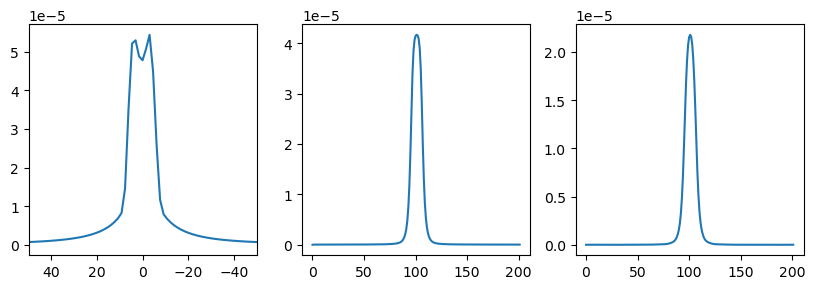

In [39]:
t = 400
fig,ax=plt.subplots(1,3,figsize=(10,3))
ax.flatten()[0].plot(freq,(caii_h[t,:]-caii_h[0,:]))
ax.flatten()[1].plot(hbeta[t,:]-hbeta[0,:])
ax.flatten()[2].plot(hgamma[t,:]-hgamma[0,:])

ax.flatten()[0].set_xlim([-50,50])
ax.flatten()[0].invert_xaxis()

(0.0, 610.0)

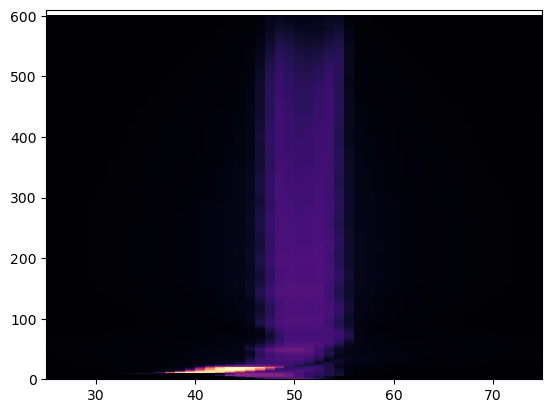

In [31]:
plt.pcolormesh(caii_h[:]-caii_h[0,:],cmap='magma')
plt.xlim([25,75])
plt.ylim([0,610])

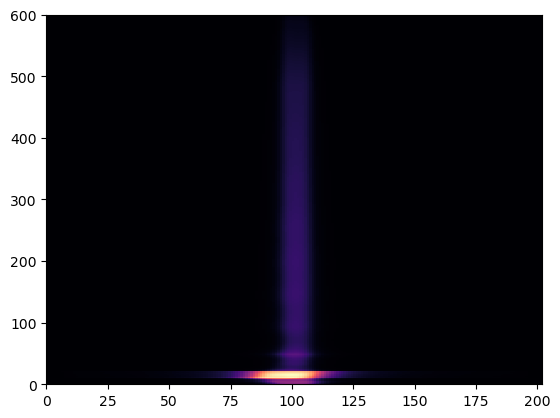

In [32]:
plt.pcolormesh(hbeta[0:600]-hbeta[0,:],cmap='magma')
#plt.xlim([25,75])

In [35]:
samples = np.arange(1,600,10)
samples

array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331, 341, 351, 361, 371, 381,
       391, 401, 411, 421, 431, 441, 451, 461, 471, 481, 491, 501, 511,
       521, 531, 541, 551, 561, 571, 581, 591])

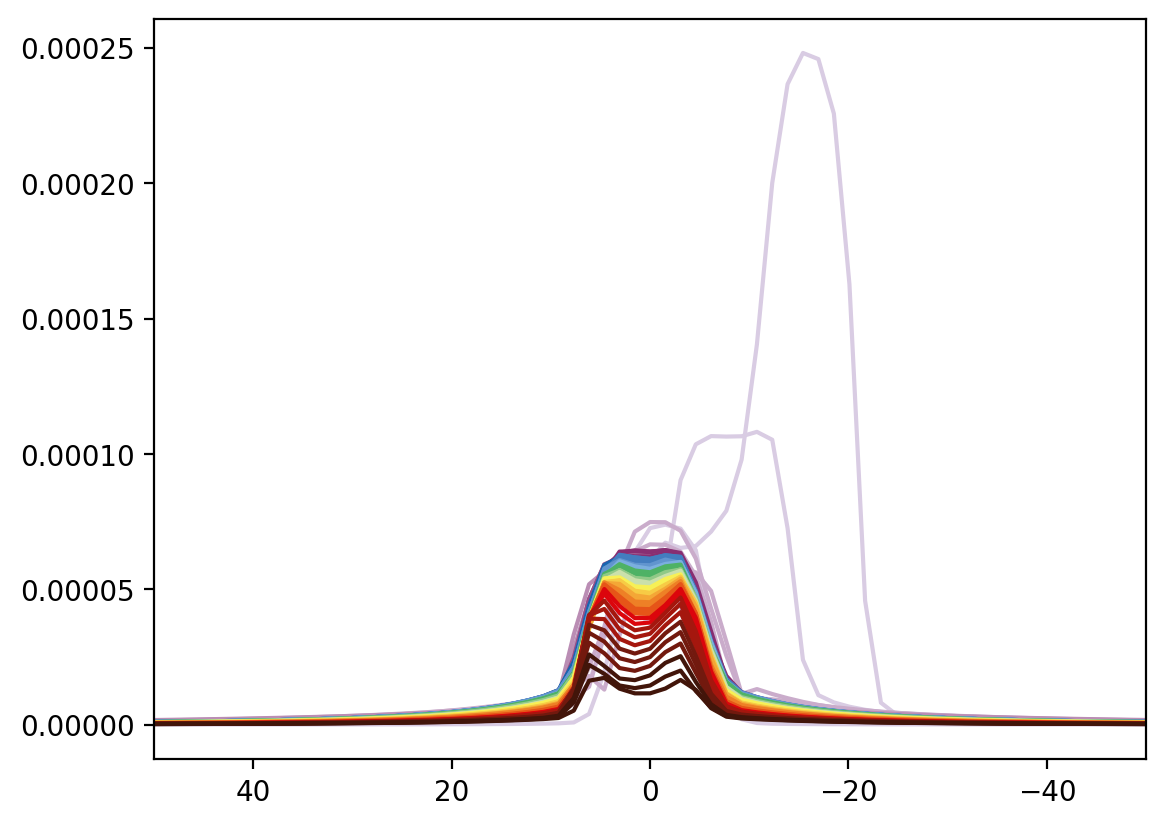

In [36]:
fig,ax=plt.subplots(dpi=200)

numcolor = len(samples)
maps = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=numcolor)
cmap_choice2 = maps(np.linspace(0,1,numcolor))

for i in range(len(samples)):
    ax.plot(freq,caii_h[samples[i],:]-caii_h[0,:],c=cmap_choice2[i],label=i)
#ax.legend()
ax.set_xlim([-50,50])
ax.invert_xaxis()